In [9]:
import pandas as pd
# Load the CSV file into a DataFrame
data_frame = pd.read_csv('drugscom.csv')
# Access a specific column by column name
column_data = ['Review']
# Save the column data to a new CSV file
column_data.to_csv('drugscom_review.csv', index=False)
print(column_data.to_csv)

<bound method NDFrame.to_csv of 0      Lipitor (atorvastatin) for High Cholesterol \t...
1      Lipitor (atorvastatin) for High Cholesterol \t...
2                                                    NaN
3      Lipitor (atorvastatin) for High Cholesterol \t...
4      Lipitor (atorvastatin) for High Cholesterol \t...
                             ...                        
376    Lipitor (atorvastatin) for High Cholesterol \t...
377    For High Cholesterol \t\t\t\t\t\t\t"Never had ...
378    Lipitor (atorvastatin) for Prevention of Cardi...
379    For High Cholesterol \t\t\t\t\t\t\t"Started th...
380    Lipitor (atorvastatin) for High Cholesterol \t...
Name: Review, Length: 381, dtype: object>


In [10]:
import pandas as pd
# Load the CSV file into a DataFrame
data_frame = pd.read_csv('webmdcom.csv')
# Access a specific column by column name
column_data = data_frame['Review']
# Save the column data to a new CSV file
column_data.to_csv('webmd_review.csv', index=False)
print(column_data.to_csv)


<bound method NDFrame.to_csv of 0      I was diagnosed with high cholesterol, HDL low...
1      No issue so far. I don't have high cholesterol...
2      I started taking this drug 3 weeks ago and rig...
3      While this medicine lowered my total cholester...
4      Atorvastatin has caused inflamation to the bil...
                             ...                        
184    Gave someone i know type 2 diabetes which caus...
185    I have arteriosclerosis but low cholesterol.  ...
186    PLEASE DO NOT TAKE THIS MEDICATION, have docto...
187    I ceased taking 10mg generic atorvastatin afte...
188    This medication sent me to the ER by ambulance...
Name: Review, Length: 189, dtype: object>


In [11]:
# Extract the reviews into a list
data_frame = pd.read_csv('drugscom.csv')
reviews = data_frame['Review'].tolist()

In [12]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

Lipitor (atorvastatin) for High Cholesterol 							"So I went to the doctor for peripheral neuropathy and back spasms.  She does my bloodwork and my cholesterol is extremely high.  She puts me on generic Lipitor and it made my back spasms even worse.  Now my upper back has a tremor that still hasn't gone away even after quitting the drug 2 months ago.  I have loss strength in my legs and I  have terrible short term memory. It would give me dizzy spells and I just felt sick all the time.  I'm still recovering from it and I told my doctor I quit taking it because it was making me shake. Now she wants me to start taking it again, but I'm not going to,"
Lipitor (atorvastatin) for High Cholesterol 							"After taking Lipitor for a few weeks I developed pain in both my legs ,arms and shoulders . After three months all my muscles were heavy and under powered I could hardly exercise .  I stopped taking Lipitor and some three months later I am nearly back to normal!
<class 'str'>


In [13]:
#import spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter


In [14]:
# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

In [15]:
# Preprocess the data
processed_data = []

In [16]:
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

In [17]:
# Print the first processed review
print(processed_data[0])

['lipitor', 'atorvastatin', 'high', 'cholesterol', 'go', 'doctor', 'peripheral', 'neuropathy', 'spasm', 'bloodwork', 'cholesterol', 'extremely', 'high', 'put', 'generic', 'lipitor', 'spasm', 'bad', 'upper', 'tremor', 'go', 'away', 'quit', 'drug', 'month', 'ago', 'loss', 'strength', 'leg', 'terrible', 'short', 'term', 'memory', 'dizzy', 'spell', 'feel', 'sick', 'time', 'recover', 'tell', 'doctor', 'quit', 'take', 'make', 'shake', 'want', 'start', 'take', 'go']


In [18]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

not_suitable_words = ['read', 'drug', 'day', 'mg', 'year', 'month', 'effect', 'stop', 'doctor', 'feel', 'muscle', 'leg',
                      'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell',
                      'know', 'ago', 'want', 'try']

# Remove the not suitable words
flattened_data = [word for word in flattened_data if word not in not_suitable_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['lipitor', 'atorvastatin', 'high', 'cholesterol', 'peripheral', 'neuropathy', 'spasm', 'bloodwork', 'cholesterol', 'extremely']


In [19]:
# Perform bag-of-words analysis
word_freq = Counter(flattened_data)
word_freq.most_common(10)

[('cholesterol', 417),
 ('high', 317),
 ('lipitor', 199),
 ('atorvastatin', 190),
 ('pain', 168),
 ('nan', 104),
 ('statin', 70),
 ('bad', 55),
 ('get', 52),
 ('experience', 43)]

In [20]:
import pandas as pd

word_freq = pd.DataFrame(word_freq.most_common(15),
                         columns=['words', 'count'])
word_freq.head()

,words,count
0,cholesterol,417
1,high,317
2,lipitor,199
3,atorvastatin,190
4,pain,168


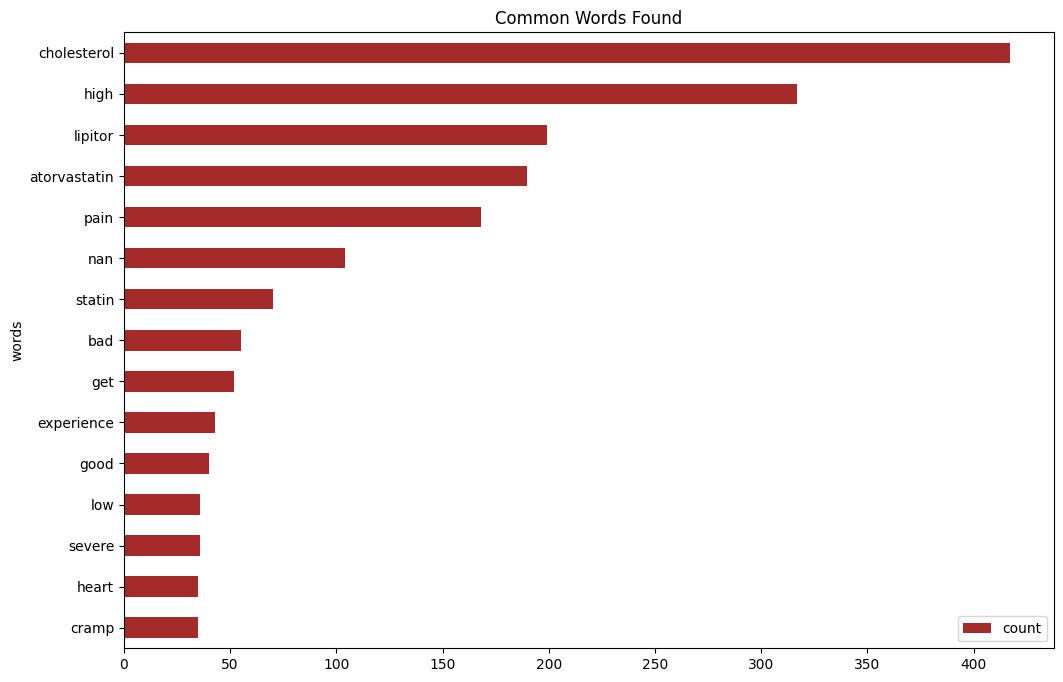

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color="brown")
ax.set_title("Common Words Found")
plt.show()

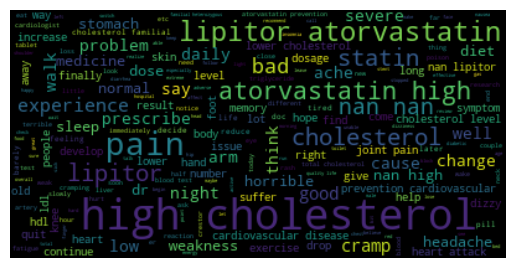

In [22]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Extract the reviews into a list
data_frame = pd.read_csv('webmdcom.csv')
reviews = data_frame['Review'].tolist()

In [24]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
No issue so far. I don't have high cholesterol and don't know how my levels have changed, but I don't have any other issues so far.
<class 'str'>


In [25]:
#import spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter


In [26]:
# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

In [27]:
# Preprocess the data
processed_data = []

In [28]:
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

In [29]:
# Print the first processed review
print(processed_data[0])

['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'day', 'day', 'grapefruit', 'day', 'exercise', 'run', 'mile', 'low', 'carbohydrate', 'diet', 'gms', 'day', 'fast', 'blood', 'test', 'show', 'increase', 'hdl', 'high', 'cholesterol', 'day', 'mg', 'day', 'day', 'cause', 'extreme', 'lightheadedness', 'tiredness', 'stop', 'feel', 'right', 'body', 'look', 'option']


In [30]:
# Extract the reviews into a list
data_frame = pd.read_csv('webmdcom.csv')
reviews = data_frame['Review'].tolist()

In [31]:
# Print the first review
print(reviews[0])
print(reviews[1])
print(type(reviews[0]))

I was diagnosed with high cholesterol, HDL low, LDH? Day 1-100 days: 1 grapefruit/day , exercise (run for 30 minutes=2 miles) & low carbohydrate diet (180 gms/day). Fasting blood test showed Increase HDL by 2.5%, still high cholesterol at 260s.  Day 101: 5 mg/day for one day has caused extreme lightheadedness, tiredness. Stop. Doesn't feel right for my body. Looking for options.
No issue so far. I don't have high cholesterol and don't know how my levels have changed, but I don't have any other issues so far.
<class 'str'>


In [32]:
# Preprocess the data
processed_data = []
# Iterate over the reviews
# and tokenize the text to remove stopwords and punctuations
# and lemmatize the text
# and convert it to lowercase
# and append it to processed_data
for review in reviews:
    doc = nlp(str(review))
    processed_data.append([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

# Print the first processed review
print(processed_data[0])

['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'day', 'day', 'grapefruit', 'day', 'exercise', 'run', 'mile', 'low', 'carbohydrate', 'diet', 'gms', 'day', 'fast', 'blood', 'test', 'show', 'increase', 'hdl', 'high', 'cholesterol', 'day', 'mg', 'day', 'day', 'cause', 'extreme', 'lightheadedness', 'tiredness', 'stop', 'feel', 'right', 'body', 'look', 'option']


In [33]:
 #Flatten the processed data
flattened_data = [word for review in processed_data for word in review]

not_suitable_words = ['read','drug', 'day','mg','year','month','effect','stop','doctor','feel','muscle', 'leg', 'medication', 'start', 'week', 'take', 'go', 'med', 'have', 'like', 'work', 'time', 'tell', 'know', 'ago', 'want', 'try']

# Remove the not suitable words
flattened_data = [word for word in flattened_data if word not in not_suitable_words]

# Print the first 10 words
print(flattened_data[:10])

# Perform bag-of-words analysis
word_freq = Counter(flattened_data)



['diagnose', 'high', 'cholesterol', 'hdl', 'low', 'ldh', 'grapefruit', 'exercise', 'run', 'mile']


In [34]:
# Perform bag-of-words analysis
word_freq = Counter(flattened_data)
word_freq.most_common(10)

[('pain', 125),
 ('cholesterol', 67),
 ('atorvastatin', 38),
 ('bad', 36),
 ('statin', 33),
 ('high', 30),
 ('heart', 27),
 ('low', 26),
 ('problem', 25),
 ('good', 25)]

In [35]:
import pandas as pd
word_freq = pd.DataFrame(word_freq.most_common(15),
                         columns=['words', 'count'])
word_freq.head()

,words,count
0,pain,125
1,cholesterol,67
2,atorvastatin,38
3,bad,36
4,statin,33


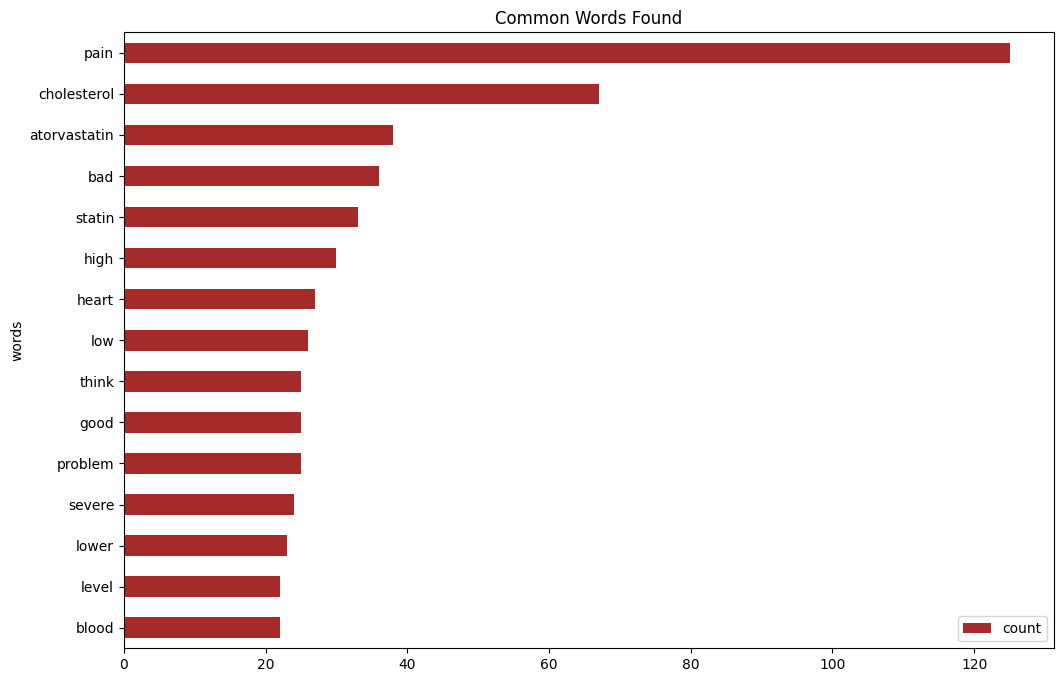

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color="brown")
ax.set_title("Common Words Found")
plt.show()

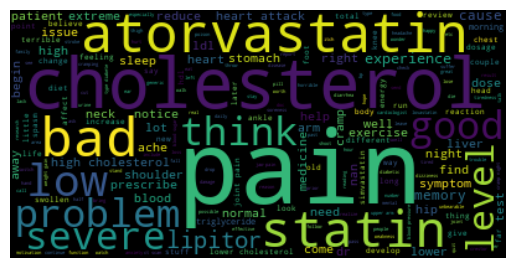

In [37]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(flattened_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
